In [1]:
import numpy as np
import pandas as pd
import os
import cv2
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout


In [2]:
X = []
Y = []
image_size = 150
labels = ['glioma_tumor','meningioma_tumor','no_tumor','pituitary_tumor']

In [4]:
# Load training data
for i in labels:
    folderPath = os.path.join('D:/SKILLS/PROJECTS/Machine Learning/Image Processing/Training', i)
    for j in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath, j))
        img = cv2.resize(img, (image_size, image_size))
        X.append(img)
        Y.append(i)

In [5]:
# Load testing data
for i in labels:
    folderPath = os.path.join('D:/SKILLS/PROJECTS/Machine Learning/Image Processing/Testing', i)
    for j in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath, j))
        img = cv2.resize(img, (image_size, image_size))
        X.append(img)
        Y.append(i)

In [6]:
X = np.array(X)
Y = np.array(Y)

# Shuffle data
X, Y = shuffle(X, Y, random_state=101)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=101)

In [8]:
# Convert labels to categorical
y_train_new = [labels.index(i) for i in y_train]
y_train = tf.keras.utils.to_categorical(y_train_new)

y_test_new = [labels.index(i) for i in y_test]
y_test = tf.keras.utils.to_categorical(y_test_new)

In [9]:
# Model architecture
def create_model():
    model = Sequential()

    # 1st Convolutional Layer
    model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(150, 150, 3)))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # 2nd Convolutional Layer
    model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # 3rd Convolutional Layer
    model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Flatten the layers
    model.add(Flatten())

    # Fully connected layer
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))

    # Output layer with 4 categories
    model.add(Dense(4, activation='softmax'))

    # Compile the model
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    return model

# Create the model
model = create_model()

d:\SKILLS\PROJECTS\Machine Learning\Image Processing\env\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
# Normalize the data
X_train = X_train / 255.0
X_test = X_test / 255.0

In [11]:
# Train the model
history = model.fit(X_train, y_train,
                    validation_data=(X_test, y_test),
                    epochs=10,
                    batch_size=32)

Epoch 1/10
173/173 ━━━━━━━━━━━━━━━━━━━━ 70s 339ms/step - accuracy: 0.5064 - loss: 1.1954 - val_accuracy: 0.7785 - val_loss: 0.5778
Epoch 2/10
173/173 ━━━━━━━━━━━━━━━━━━━━ 69s 398ms/step - accuracy: 0.7744 - loss: 0.5526 - val_accuracy: 0.8844 - val_loss: 0.3079
Epoch 3/10
173/173 ━━━━━━━━━━━━━━━━━━━━ 53s 304ms/step - accuracy: 0.8816 - loss: 0.3076 - val_accuracy: 0.9397 - val_loss: 0.1870
Epoch 4/10
173/173 ━━━━━━━━━━━━━━━━━━━━ 66s 382ms/step - accuracy: 0.9203 - loss: 0.2130 - val_accuracy: 0.9560 - val_loss: 0.1311
Epoch 5/10
173/173 ━━━━━━━━━━━━━━━━━━━━ 54s 311ms/step - accuracy: 0.9417 - loss: 0.1719 - val_accuracy: 0.9756 - val_loss: 0.0838
Epoch 6/10
173/173 ━━━━━━━━━━━━━━━━━━━━ 47s 269ms/step - accuracy: 0.9625 - loss: 0.0965 - val_accuracy: 0.9772 - val_loss: 0.0767
Epoch 7/10
173/173 ━━━━━━━━━━━━━━━━━━━━ 46s 266ms/step - accuracy: 0.9690 - loss: 0.0874 - val_accuracy: 0.9853 - val_loss: 0.0590
Epoch 8/10
173/173 ━━━━━━━━━━━━━━━━━━━━ 50s 290ms/step - accuracy: 0.9762 - loss: 0

In [12]:
# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_acc}")

20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 70ms/step - accuracy: 0.9958 - loss: 0.0244
Test accuracy: 0.9934853315353394


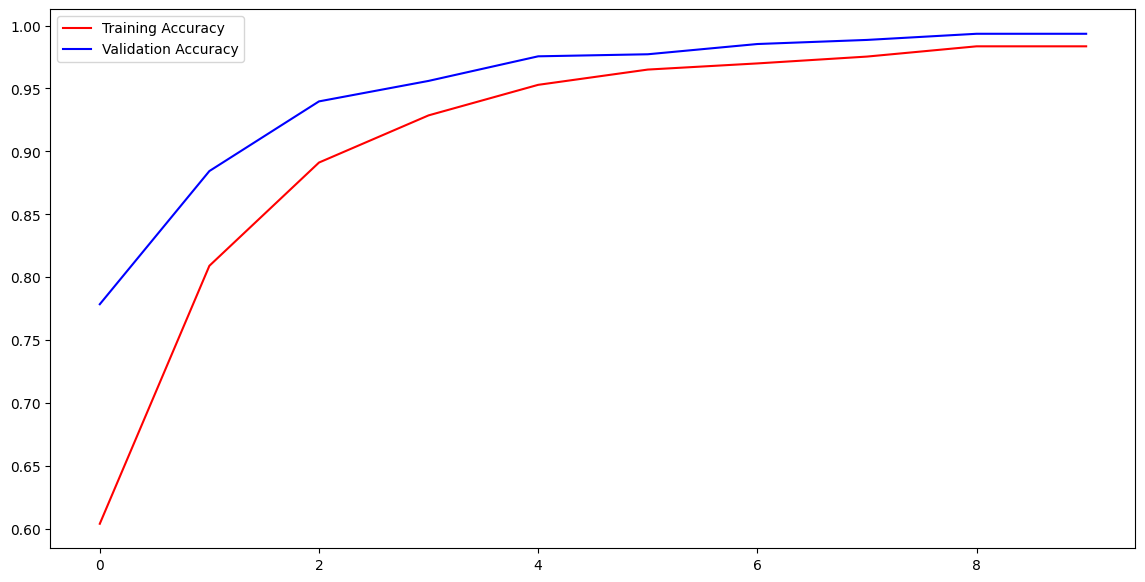

In [16]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(len(acc))
fig = plt.figure(figsize=(14,7))
plt.plot(epochs,acc,'r',label="Training Accuracy")
plt.plot(epochs,val_acc,'b',label="Validation Accuracy")
plt.legend(loc='upper left')
plt.show()

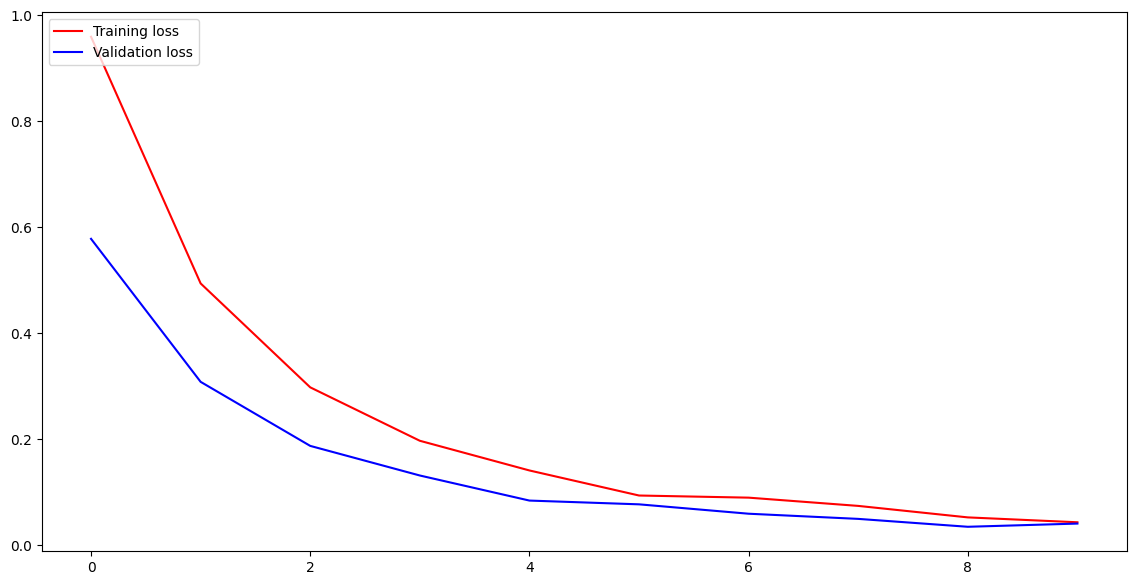

In [17]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(loss))
fig = plt.figure(figsize=(14,7))
plt.plot(epochs,loss,'r',label="Training loss")
plt.plot(epochs,val_loss,'b',label="Validation loss")
plt.legend(loc='upper left')
plt.show()

In [13]:
from tensorflow.keras.preprocessing import image
import numpy as np

# Function to preprocess a single image
def preprocess_image(image_path):
    img = image.load_img(image_path, target_size=(150, 150))  # Resize image to 150x150
    img_array = image.img_to_array(img)  # Convert the image to array
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension (1, 150, 150, 3)
    img_array /= 255.0  # Normalize the image (same as during training)
    return img_array

In [15]:
def predict_tumor(image_path, model):
    
    img_array = preprocess_image(image_path)
    
    predictions = model.predict(img_array)
    
    # Categories (labels should be in the same order as used during training)
    labels = ['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor']
    
    # Get the predicted class index
    predicted_class_idx = np.argmax(predictions)
    
    # Get the label corresponding to the predicted class index
    predicted_class = labels[predicted_class_idx]
    
    # Get the confidence score
    confidence_score = np.max(predictions)
    
    return predicted_class, confidence_score

<>:2: SyntaxWarning: invalid escape sequence '\S'
<>:2: SyntaxWarning: invalid escape sequence '\S'
C:\Users\R.PRAVEEN KUMAR\AppData\Local\Temp\ipykernel_22260\263643233.py:2: SyntaxWarning: invalid escape sequence '\S'
  file_path = 'D:\SKILLS\PROJECTS\Machine Learning\Image Processing\Testing\\no_tumor\image(10).jpg'


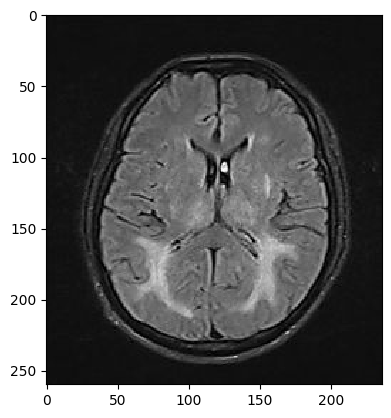

In [26]:
from tensorflow.keras.preprocessing import image
file_path = 'D:\SKILLS\PROJECTS\Machine Learning\Image Processing\Testing\\no_tumor\image(10).jpg'
img = image.load_img(file_path)
plt.imshow(img,interpolation='nearest')
plt.show()

In [27]:
image_path = file_path # Replace with the path to your image
predicted_class, confidence = predict_tumor(image_path, model)
print(f"Predicted tumor type: {predicted_class}, Confidence: {confidence:.2f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Predicted tumor type: no_tumor, Confidence: 1.00


In [28]:
model.save('braintumor2.h5')